# Train a Fully Connected Network for Regression

In [8]:
from __future__ import print_function
import torch; print(torch.__version__)

1.0.1


In [9]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as utils
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        # 2 hidden layers?
        self.fc1 = nn.Linear(1, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=1, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=1, bias=True)
)


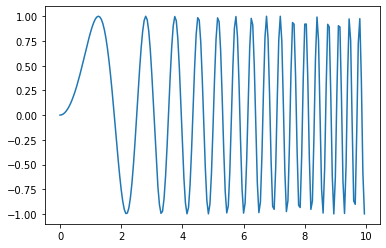

In [16]:
inputs = Variable(torch.arange(0,10,.05))
#true_vals = torch.mul(inputs, inputs)
true_vals = torch.sin(inputs * inputs)
plt.plot(list(inputs.data), list(true_vals.data))
plt.show()

In [17]:
net.zero_grad()
outputs = net(Variable(torch.Tensor([0])))
outputs.backward(torch.randn(1)) # Use random gradients to break symmetry?

learning_rate = 1 # Need to initialize carefully
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

ML (loss=0.356611): 100%|██████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.32it/s]


Finished Training


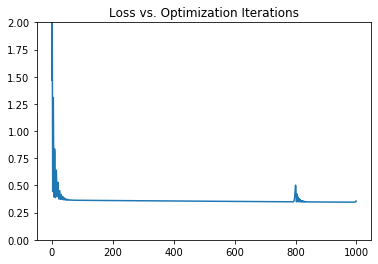

In [18]:
from tqdm import trange # Used to provide progress bar

losses = []

# create your optimizer
optimizer = optim.Adam(net.parameters())
criterion = nn.MSELoss()

num_epochs = 1000
t = trange(num_epochs)
for epoch in t:  # loop over the dataset multiple times

    running_loss = 0.0

    # wrap them in Variable
    reshaped_inputs = inputs.view(-1, 1) # Structure with each input in its own row
    reshaped_outputs = true_vals.view(-1, 1) # Neglecting to have outputs and true vals to match dimension is a common mistake.

    # forward + backward + optimize
    outputs = net(reshaped_inputs)
    #print(outputs)
    #print(reshaped_outputs)
    loss = criterion(outputs, reshaped_outputs)
    losses.append(loss)
    
    loss.backward()
    optimizer.step()
    
    # zero the parameter gradients
    optimizer.zero_grad()
    
    t.set_description('ML (loss=%g)' % loss.item()) # Updates Loss information
    #t.set_description('ML Loss: ' + str(loss.item())) # Updates Loss information

print('Finished Training')

plt.plot(range(len(losses)), losses)
plt.ylim(0, 2) # Set convenient plotting limits to see the interesting region.
plt.title("Loss vs. Optimization Iterations")
plt.show()

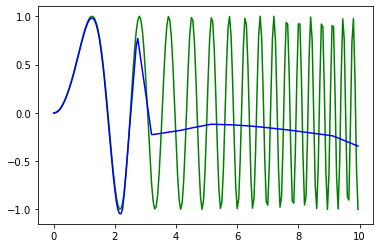

In [19]:
predicted =net.forward(reshaped_inputs).data.numpy()

plt.plot(list(inputs.data), list(true_vals.data), 'g')
plt.plot(list(inputs.data), predicted, 'b')
plt.show()

# Assignment:
1. Parameterize the class Net to take a custom breadth.
2. Plot loss vs. breadth for several instance of Net on the dataset above.

# Stretch Goals:
- Add a depth parameter to Net and plot performance vs. depth.
- Plot performance vs number of points for some fixed size net.